# The Steady State Appoximation

**Rio Agustian Gilang Fernando**

**Advanced Material Science and Nanotechnology**


Consider the simplest case of a multi-step readtion A $\rightarrow$ B $\rightarrow$ C, in which a reactant, A, is converted, by a unimolecular process, to an intermediete, B, which then proceeds to fotm the product, C:

\begin{align}
\frac{d[A]}{dt}&=-k_1[A], \\
\frac{d[B]}{dt}&=k_1[A] - k_2[B], \\
\frac{d[C]}{dt}&=k_2[B].
\end{align}

I n this case, the kinetcis can be solved anallitically. For the case $k_1 \neq k_2$, one obtains:

\begin{align}
[A]&=[A]_0e^{-k_1t} \\
[B]&=\frac{k_1[A]_0}{k_2-k_1} (e^{-k_1t} - e^{-k_2t}) \\
[C]&=[A]_0 - [A]- [B]
\end{align}

(the last equation follows from mass balance)
To take a concrete example, onsider $k_1=1s^{-1}$ and $k_2=0.1s^{-1}$

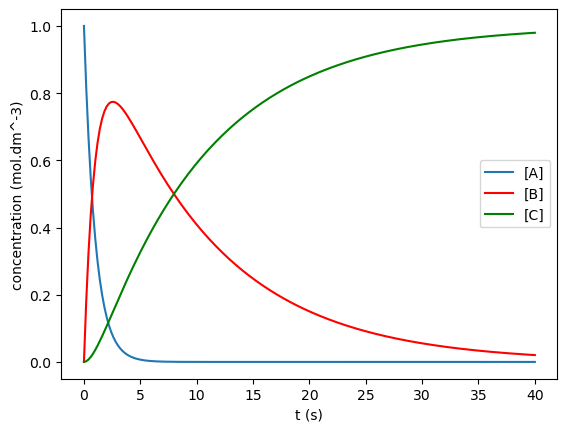

In [76]:
import numpy as np
import matplotlib.pyplot as plt

t = np.linspace(0, 40, 200)

def plot_kinetics(k1, k2, A0=1):
    """Plot [A], [B], and [C] from the analytical rate expression."""
    A = A0 * np.exp(-k1*t)
    B = k1 * A0 / (k2 - k1) * (np.exp(-k1*t) - np.exp(-k2*t))
    C = A0 - A - B
    plt.plot(t, A, label="[A]")
    plt.plot(t, B, label="[B]", c="red")
    plt.plot(t, C, label="[C]", c="green")
    plt.legend()
    plt.xlabel("t (s)")
    plt.ylabel("concentration (mol.dm^-3)")

def annote_plot():
    plt.legend()
    plt.xlabel("t (s)")
    plt.ylabel("concentration (mol.dm^-3)")

k1, k2 = 1, 0.1
plot_kineticks(k1, k2)
annote_plot()
plt.show()

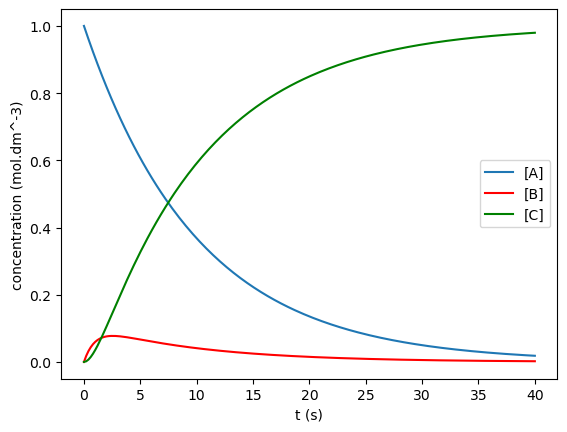

In [82]:
k1, k2 = 0.1, 1
plot_kineticks(k1, k2)
annote_plot()
plt.show()

In this case, the steady-state apporximation consists of the assumptions that at the given instant in time:

$$\frac{d[B]}{dt} = k_1[A]- k_2[B] =  0 $$

and hence

$$\frac{d[C]}{dt} = k_2[B] = k_1[A] $$

That is,

$$[B]_{ss} = \frac{k_1}{k_2}[A]$$

and
$$\int^{[C]}_0 d[C] = \int^t_0 k_1[A]dt = [A]_0 \int^t_0 e^{-k_1t} dt$$

$$\Rightarrow [C]_ss = [A]_0 (1-e^{-kt})$$

Noter that the assumptions of steady state does not mean that [B] remains constant: Its value tracks that of [A] in proportion $k_1 / k_2$ and since [A] is decreasing, after the induction period, so deos [B].

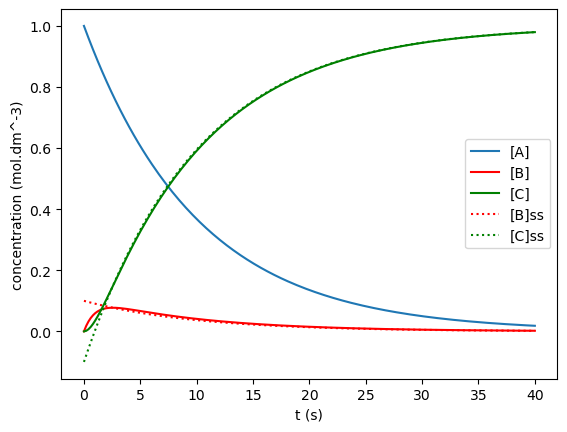

In [84]:
def plot_kinetics_ss(k1, k2, A0=1):
    """Plot [A], [B], and [C] from steady-state rate expression."""
    A = A0 * np.exp(-k1 * t)
    Bss = k1/k2 * A
    Css = A0 - A - Bss
    plt.plot(t, Bss, label="[B]ss", ls=":", c="red")
    plt.plot(t, Css, label="[C]ss", ls=":", c="green")
plot_kinetics(k1, k2)
plot_kinetics_ss(k1, k2)
annote_plot()
plt.show()

The induction period ;ast about 3 seconds, after which the steady-state apporximation (dotted lines) closely tracks the analytical solution. The function ```plt.xlim``` and ```plt.ylim``` can be used to zoom  in on this induction period:

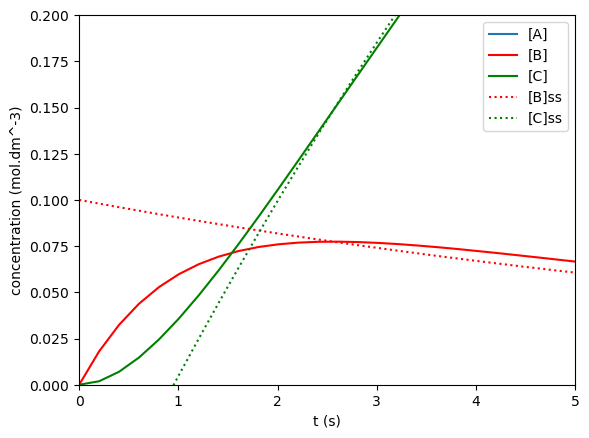

In [92]:
plot_kinetics(k1, k2)
plot_kinetics_ss(k1, k2)
annote_plot()
plt.xlim(0, 5)
plt.ylim(0, 0.2)
plt.show()